# Dealing with Categorical Data in Machine Learning
One of the tasks involved in data preparation for machine learning is to convert textual data into numerical data

While many datasets contain categorical features (e.g., M or F), machine learning algorithms typically only work with numerical data. Categorical and text data must therefore be converted to numerical data for use in machine learning—which is what we'll do in this section.

In [1]:
# initial imports
import pandas as pd
from path import Path

In [2]:
# Load data
file_path = Path("../Resources/loans_data.csv")
loans_df = pd.read_csv(file_path)
loans_df.head()

,amount,term,month,age,education,gender,bad
0,1000,30,June,45,High School or Below,male,0
1,1000,30,July,50,Bachelor,female,0
2,1000,30,August,33,Bachelor,female,0
3,1000,15,September,27,college,male,0
4,1000,30,October,28,college,female,0


## Dataset Information

The file `loans_data.csv`, contains simulated data about loans, there are a total of 500 records. Each row represents a loan application along an arbitrary year, where every column represents the following data about every loan application.

* `amount`: The loan amount in USD.
* `term`: The loan term in months.
* `month`: The month of the year when the loan was requested.
* `age`: Age of the loan applicant.
* `education`: Educational level of the loan applicant.
* `gender`: Gender of the loan applicant.
* `bad`: Stands for a bad or good loan applicant (`1` - bad, `0` - good).

## IMPORTANT
Scikit-learn's algorithms only understand numeric data.

In [3]:
# Binary encoding using Pandas (single column)  
# First argument pd.get_dummies() here is the Dataframe.
# Second arguement specifies the column to be encoded.
loans_binary_encoded = pd.get_dummies(loans_df, columns=["gender"])
loans_binary_encoded.head()

,amount,term,month,age,education,bad,gender_female,gender_male
0,1000,30,June,45,High School or Below,0,0,1
1,1000,30,July,50,Bachelor,0,1,0
2,1000,30,August,33,Bachelor,0,1,0
3,1000,15,September,27,college,0,0,1
4,1000,30,October,28,college,0,1,0


To use Scikit-learn's machine learning algorithms, the text features (month, education, and gender) will have to be converted into numbers. This process is called encoding. Furthermore, the steps taken to prepare the data to make them usable for building machine learning models are called preprocessing. Encoding text labels into numerical values is one preprocessing step. Later we'll discuss scaling, another preprocessing step.

The first and the simplest encoding we'll perform in this dataset is with the gender column, which contains only two values: male and female. We'll convert these values into numerical ones with the pd.get_dummies() method:

The method takes two arguments:

The first argument for pd.get_dummies() here is the DataFrame.

The second argument specifies the column to be encoded.

In [4]:
# Binary encoding using Pandas (multiple columns)
loans_binary_encoded = pd.get_dummies(loans_df, columns=["education", "gender"])
loans_binary_encoded.head()

,amount,term,month,age,bad,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,June,45,0,0,1,0,0,0,1
1,1000,30,July,50,0,1,0,0,0,1,0
2,1000,30,August,33,0,1,0,0,0,1,0
3,1000,15,September,27,0,0,0,0,1,0,1
4,1000,30,October,28,0,0,0,0,1,1,0


The gender column has split into two columns. The education column has split into four columns (Bachelor, High School or Below, Master or Above, and college), with an associated 0 or 1. If a loan applicant has a bachelor's degree, that column will read 1, and the others (High School or Below, Master or Above, and college) will read 0. For an applicant who did not graduate from high school, the education_Bachelor, education_Master or Above, and education_college columns will be 0, and the education_High School or Below will show 1.

## Encode Labels With Scikit-learn
Scikit-learn's LabelEncoder module can also transform text into numerical data. Let's look at an example. Continue down the notebook from the preceding section:

In [5]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder() 
df2 = loans_df.copy() 
df2['education'] = le.fit_transform(df2['education'])  

The code includes the following elements:

After importing the module, an instance of the label encoder object is created and assigned the variable le.

A copy of the original loans_df is created for this example, but this step is not necessary for using label encoder.

The label encoder's fit_transform() method is used to first train the label encoder, then convert the text data into numerical data.

The result is a numerical encoding of the education column. In contrast to pd.get_dummies(), the label encoder assigns a number between 0 and 3 for each of the education categories. The applicant in the first row, for example, has the value 1, which represents high school or below:

In [7]:
# Look at the data
df2.head()

,amount,term,month,age,education,gender,bad
0,1000,30,June,45,1,male,0
1,1000,30,July,50,0,female,0
2,1000,30,August,33,0,female,0
3,1000,15,September,27,3,male,0
4,1000,30,October,28,3,female,0


# Create Custom Encoding
It's also possible to create custom encoding functions. To understand why this might be useful, let's first look at using the LabelEncoder module. With it, you'll transform the month column into numbers. The goal is to transform each month into its corresponding order: for example, January should be transformed to 1, since it's the first month of the year. Similarly, July should be transformed to 7, since it's the seventh month of the year:

In [7]:
# Creating an instance of label encoder
label_encoder = LabelEncoder()
loans_df["month_le"] = label_encoder.fit_transform(loans_df["month"])
loans_df.head()

,amount,term,month,age,education,gender,bad,month_le
0,1000,30,June,45,High School or Below,male,0,6
1,1000,30,July,50,Bachelor,female,0,5
2,1000,30,August,33,Bachelor,female,0,1
3,1000,15,September,27,college,male,0,11
4,1000,30,October,28,college,female,0,10


Note that a new instance of LabelEncoder was created here as label_encoder. The month of August, for example, is converted to 1 instead of 8. July is converted to 5 instead of 7.

Instead, we can create a dictionary of the months of the year and apply a custom function to convert the month names to their corresponding integers:

In [8]:
# Months dictionary
months_num = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12,
}



In the next cell, a lambda function is applied to the month column to perform the actual conversion:

In [9]:
# Months' names encoded using the dictionary values
loans_df["month_num"] = loans_df["month"].apply(lambda x: months_num[x])  
loans_df.head()



,amount,term,month,age,education,gender,bad,month_le,month_num
0,1000,30,June,45,High School or Below,male,0,6,6
1,1000,30,July,50,Bachelor,female,0,5,7
2,1000,30,August,33,Bachelor,female,0,1,8
3,1000,15,September,27,college,male,0,11,9
4,1000,30,October,28,college,female,0,10,10


The following actions are taking place:

A transformation is made to the values of the month column, and the transformed values are placed in the month_num column.

The apply() method runs the function inside its parentheses on each element of the month column.

The lambda function takes an argument (x), and returns months_num[x]. For example, if the value in the month column is "June," the function returns months_num["June"], which is 6.

## Note 
Lambda functions are anonymous Python functions.

The DataFrame's month_num column now displays each month as a number:

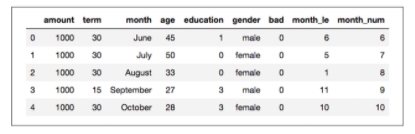

The code in the next cell is merely cleanup—it drops the unnecessary columns related to the month:

In [10]:
# Drop the month and month_le columns
loans_df = loans_df.drop(["month", "month_le"], axis=1)
loans_df.head()

,amount,term,age,education,gender,bad,month_num
0,1000,30,45,High School or Below,male,0,6
1,1000,30,50,Bachelor,female,0,7
2,1000,30,33,Bachelor,female,0,8
3,1000,15,27,college,male,0,9
4,1000,30,28,college,female,0,10
